In [527]:
import numpy as np
import pandas as pd

In [528]:
##Importação dos dados de treino

In [529]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [530]:
##Remoção de colunas inteiramente preenchidas por NaN

In [531]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [532]:
##Introdução do cabeçalho do data frame

In [533]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [534]:
##Geração de Histogramas e seleção de variáveis

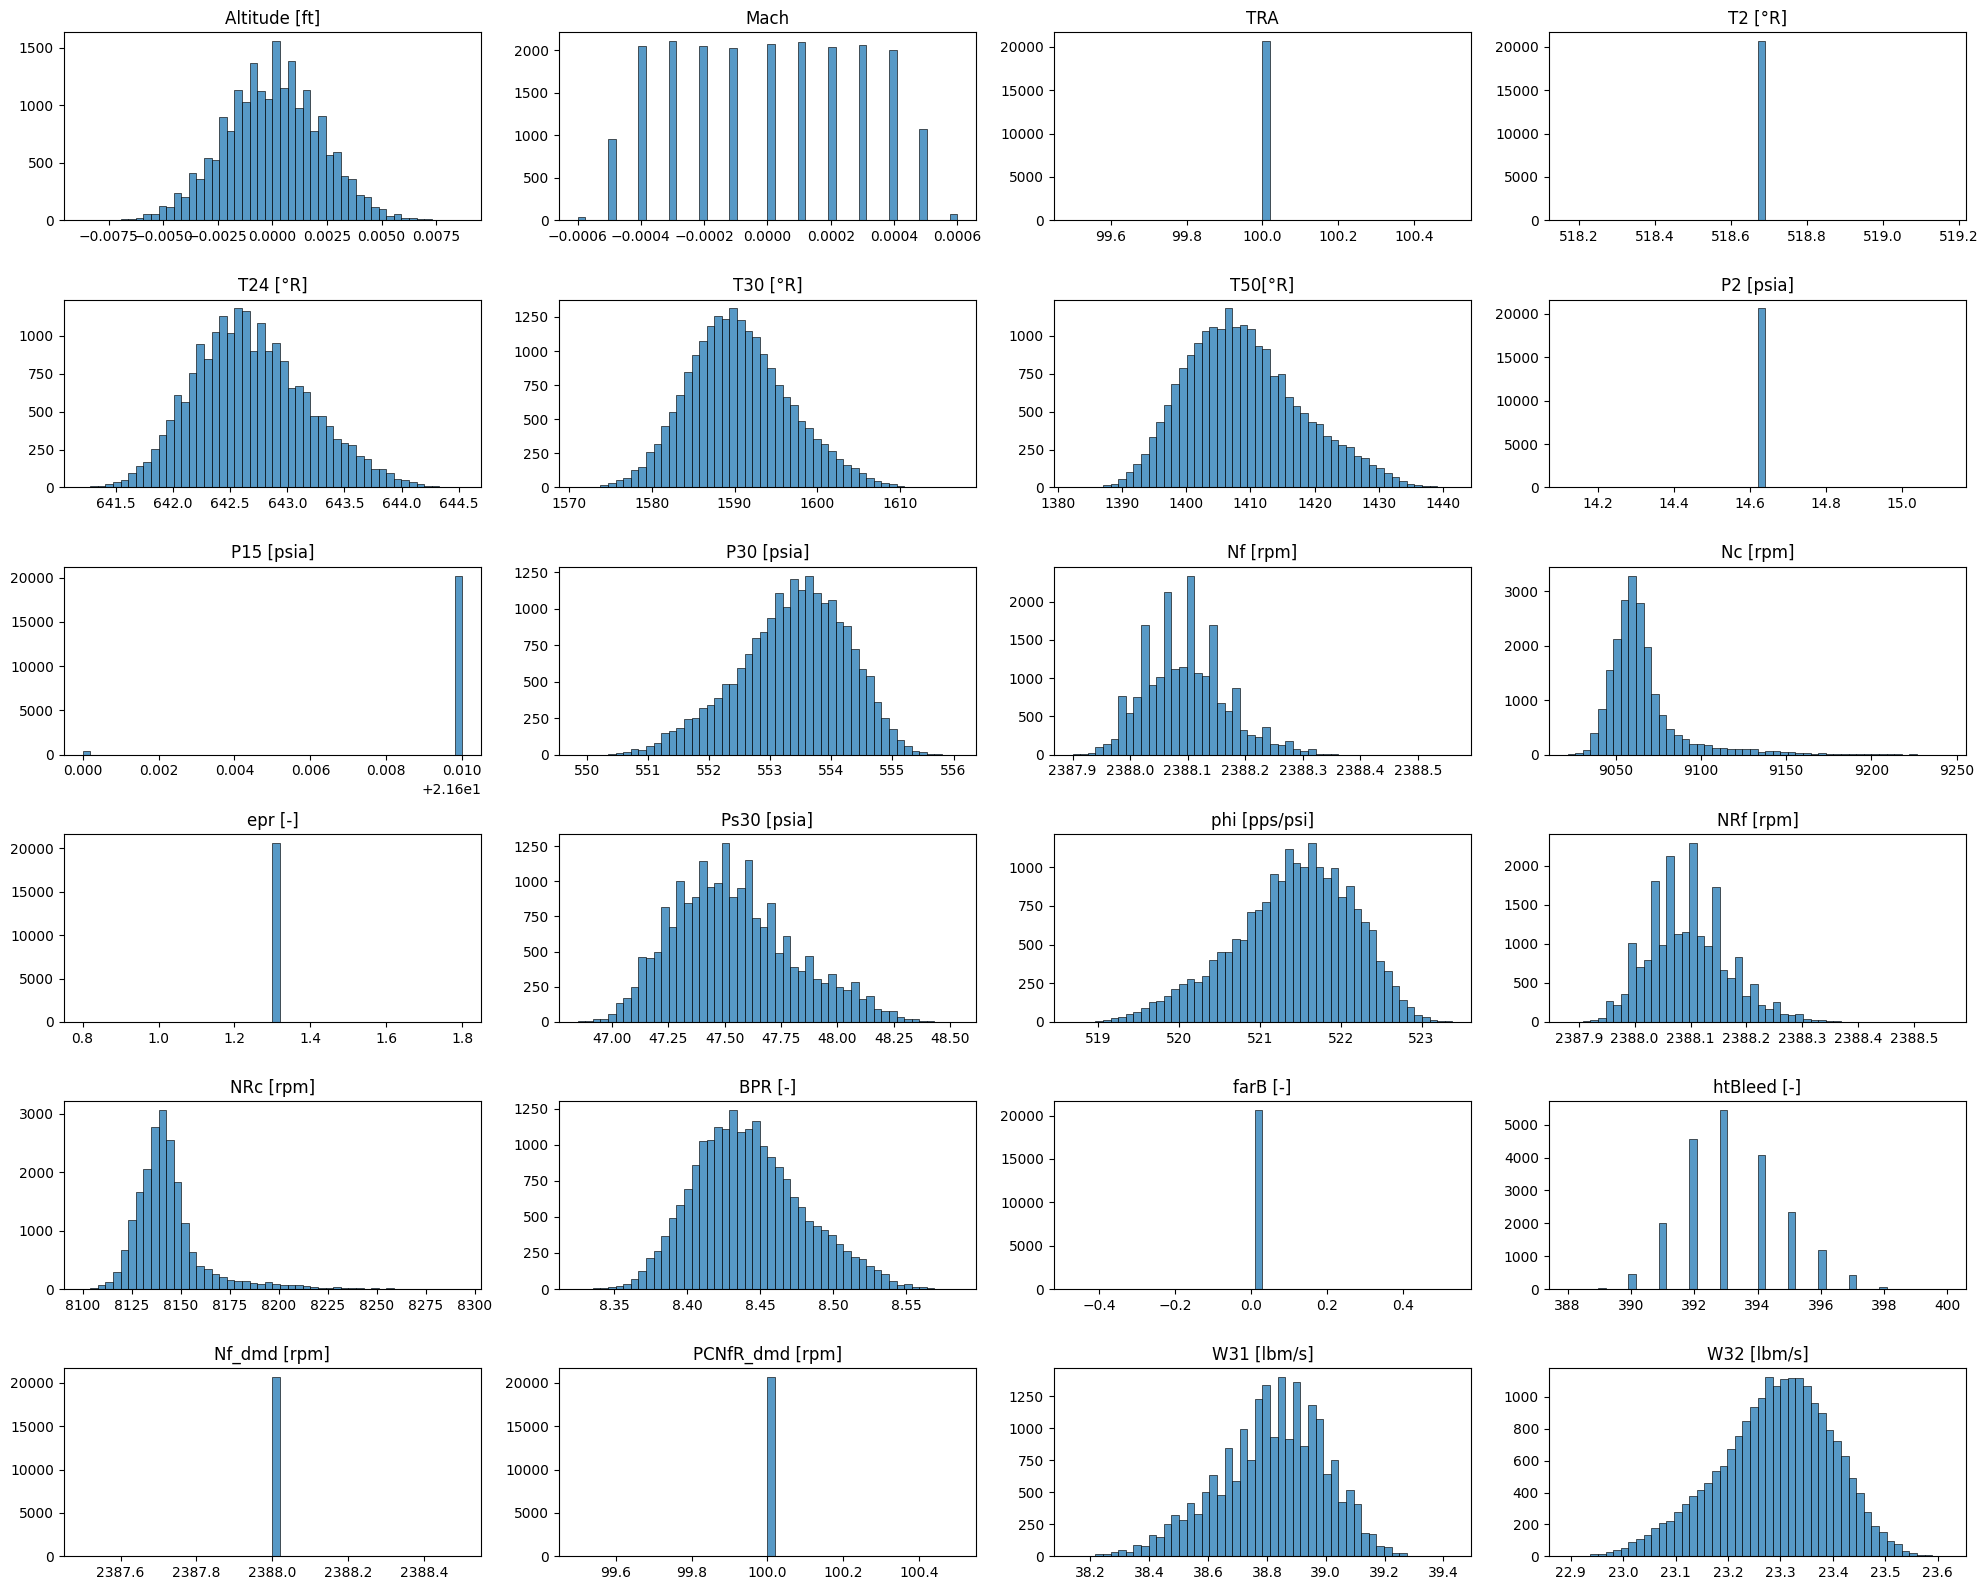

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [536]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [537]:
##Normalização

In [538]:
from sklearn.preprocessing import MinMaxScaler

In [539]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [540]:
##Definição dos targets para regressão e classificação nos dados de treino

In [541]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [542]:
##Visualização de um ciclo de vida de um motor

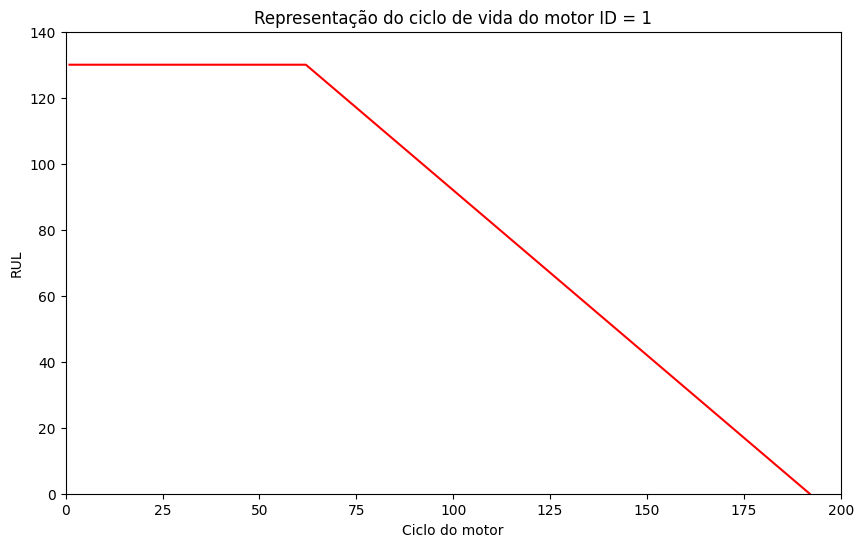

In [543]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [544]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [545]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [546]:
##Criação das janelas de tempo para dados de treino e de teste

In [547]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [548]:
##Separação das variáveis de treino e teste

In [549]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [550]:
##Criação do modelo LSTM

In [551]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [552]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 3990.1631 - mean_absolute_error: 52.2745 - mean_squared_error: 3990.1631

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - loss: 2402.0132 - mean_absolute_error: 40.7845 - mean_squared_error: 2402.0132 - val_loss: 993.9727 - val_mean_absolute_error: 26.3472 - val_mean_squared_error: 993.9727
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 903.9445 - mean_absolute_error: 24.4471 - mean_squared_error: 903.9445

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 868.3550 - mean_absolute_error: 23.6532 - mean_squared_error: 868.3550 - val_loss: 600.7708 - val_mean_absolute_error: 20.8169 - val_mean_squared_error: 600.7708
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 719.0164 - mean_absolute_error: 21.2165 - mean_squared_error: 719.0164

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - loss: 704.9010 - mean_absolute_error: 20.8540 - mean_squared_error: 704.9010 - val_loss: 773.8289 - val_mean_absolute_error: 22.1560 - val_mean_squared_error: 773.8289
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 616.3182 - mean_absolute_error: 19.3418 - mean_squared_error: 616.3182

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 583.6578 - mean_absolute_error: 18.7796 - mean_squared_error: 583.6578 - val_loss: 337.0743 - val_mean_absolute_error: 14.8180 - val_mean_squared_error: 337.0743
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 486.1415 - mean_absolute_error: 17.0984 - mean_squared_error: 486.1415

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 481.5018 - mean_absolute_error: 17.0422 - mean_squared_error: 481.5018 - val_loss: 606.9349 - val_mean_absolute_error: 19.0042 - val_mean_squared_error: 606.9349
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 454.3401 - mean_absolute_error: 16.3430 - mean_squared_error: 454.3401

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 428.2530 - mean_absolute_error: 15.9627 - mean_squared_error: 428.2530 - val_loss: 250.8146 - val_mean_absolute_error: 12.1204 - val_mean_squared_error: 250.8146
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 388.8473 - mean_absolute_error: 15.2214 - mean_squared_error: 388.8473

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 400.3098 - mean_absolute_error: 15.3446 - mean_squared_error: 400.3098 - val_loss: 460.8571 - val_mean_absolute_error: 17.3768 - val_mean_squared_error: 460.8571
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 372.0207 - mean_absolute_error: 14.8915 - mean_squared_error: 372.0207

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 367.8553 - mean_absolute_error: 14.7076 - mean_squared_error: 367.8553 - val_loss: 306.0928 - val_mean_absolute_error: 13.5068 - val_mean_squared_error: 306.0928
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 348.0840 - mean_absolute_error: 14.3265 - mean_squared_error: 348.0840

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 349.7343 - mean_absolute_error: 14.3028 - mean_squared_error: 349.7343 - val_loss: 230.8092 - val_mean_absolute_error: 11.0095 - val_mean_squared_error: 230.8092
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 351.9960 - mean_absolute_error: 14.2242 - mean_squared_error: 351.9960

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 344.5942 - mean_absolute_error: 14.1111 - mean_squared_error: 344.5942 - val_loss: 296.4160 - val_mean_absolute_error: 13.6714 - val_mean_squared_error: 296.4160
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 329.6293 - mean_absolute_error: 13.9276 - mean_squared_error: 329.6293

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 329.5879 - mean_absolute_error: 13.8086 - mean_squared_error: 329.5879 - val_loss: 247.6286 - val_mean_absolute_error: 12.1466 - val_mean_squared_error: 247.6286
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 317.8642 - mean_absolute_error: 13.4696 - mean_squared_error: 317.8642

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 323.1077 - mean_absolute_error: 13.6029 - mean_squared_error: 323.1077 - val_loss: 213.5616 - val_mean_absolute_error: 10.9870 - val_mean_squared_error: 213.5616
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 309.5579 - mean_absolute_error: 13.2766 - mean_squared_error: 309.5579

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 314.4259 - mean_absolute_error: 13.4200 - mean_squared_error: 314.4259 - val_loss: 215.3711 - val_mean_absolute_error: 10.8116 - val_mean_squared_error: 215.3711
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 326.8834 - mean_absolute_error: 13.5983 - mean_squared_error: 326.8834

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 315.3008 - mean_absolute_error: 13.3870 - mean_squared_error: 315.3008 - val_loss: 243.6050 - val_mean_absolute_error: 11.0261 - val_mean_squared_error: 243.6050
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 320.7803 - mean_absolute_error: 13.5187 - mean_squared_error: 320.7803

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 306.1701 - mean_absolute_error: 13.2212 - mean_squared_error: 306.1701 - val_loss: 282.6113 - val_mean_absolute_error: 12.7785 - val_mean_squared_error: 282.6113
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 296.9808 - mean_absolute_error: 12.9760 - mean_squared_error: 296.9808

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 297.6478 - mean_absolute_error: 13.0074 - mean_squared_error: 297.6478 - val_loss: 212.2960 - val_mean_absolute_error: 10.3182 - val_mean_squared_error: 212.2960
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 289.2596 - mean_absolute_error: 12.7897 - mean_squared_error: 289.2596

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 299.6518 - mean_absolute_error: 13.0323 - mean_squared_error: 299.6518 - val_loss: 240.3029 - val_mean_absolute_error: 12.0093 - val_mean_squared_error: 240.3029
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 275.4101 - mean_absolute_error: 12.4705 - mean_squared_error: 275.4101

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 284.6970 - mean_absolute_error: 12.6779 - mean_squared_error: 284.6970 - val_loss: 264.7903 - val_mean_absolute_error: 12.5531 - val_mean_squared_error: 264.7903
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 302.4878 - mean_absolute_error: 13.0848 - mean_squared_error: 302.4878

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 289.5458 - mean_absolute_error: 12.7767 - mean_squared_error: 289.5458 - val_loss: 218.8929 - val_mean_absolute_error: 11.1870 - val_mean_squared_error: 218.8929
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 279.6744 - mean_absolute_error: 12.5622 - mean_squared_error: 279.6744

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 283.0613 - mean_absolute_error: 12.6337 - mean_squared_error: 283.0613 - val_loss: 276.7075 - val_mean_absolute_error: 11.2215 - val_mean_squared_error: 276.7075
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 281.8319 - mean_absolute_error: 12.5854 - mean_squared_error: 281.8319

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 278.0707 - mean_absolute_error: 12.5244 - mean_squared_error: 278.0707 - val_loss: 221.6009 - val_mean_absolute_error: 10.2003 - val_mean_squared_error: 221.6009


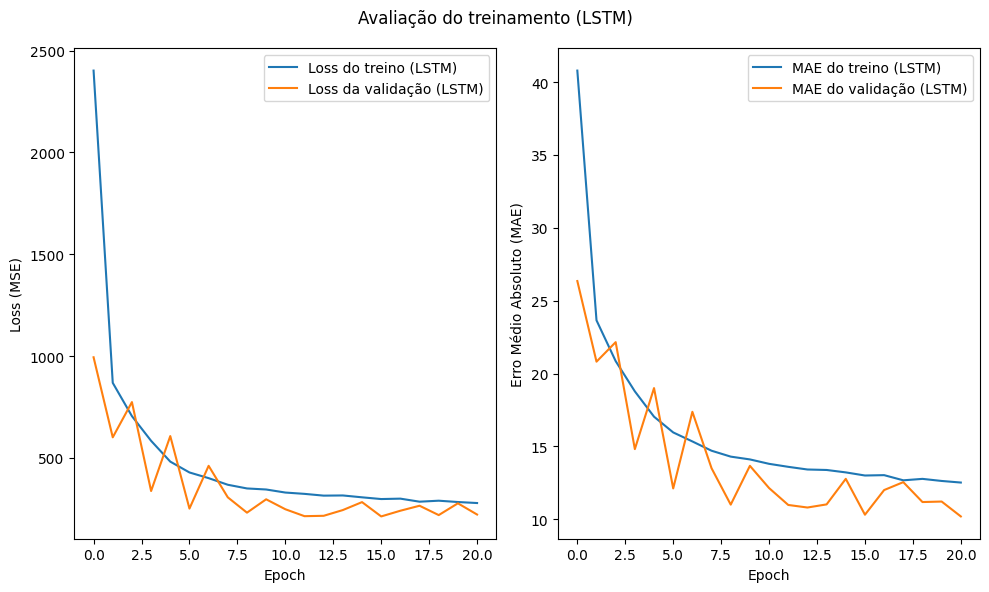

In [553]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [554]:
##Testando o modelo com os dados de teste 

In [555]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [556]:
##Avaliando o modelo

234.51671432431772
15.31
0.12507094224065485
10.613951117396589
0.763194725499505
Tempo de 256.443144s


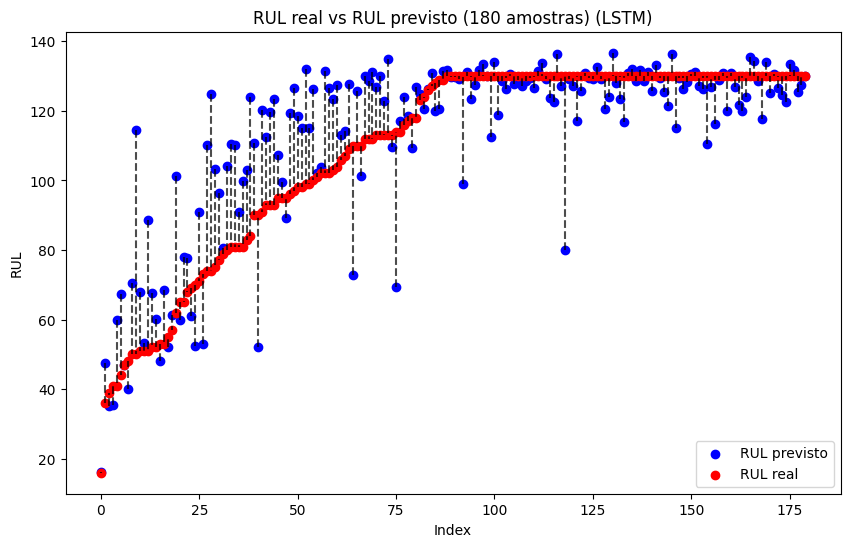

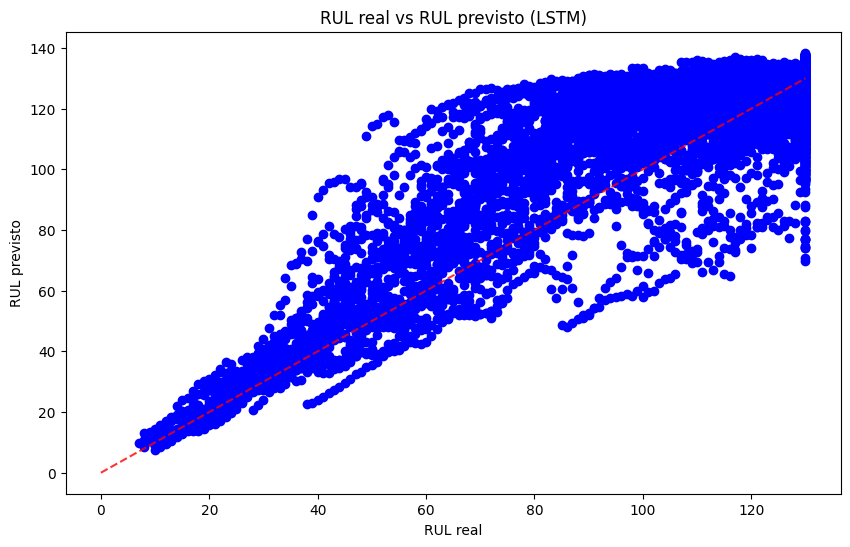

In [557]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [558]:
##Criando modelo BiLSTM

In [559]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [560]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 5743.6523 - mean_absolute_error: 64.1774 - mean_squared_error: 5743.6523

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 3815.7375 - mean_absolute_error: 51.7568 - mean_squared_error: 3815.7375 - val_loss: 1874.7843 - val_mean_absolute_error: 38.6123 - val_mean_squared_error: 1874.7843
Epoch 2/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1426.5228 - mean_absolute_error: 32.6194 - mean_squared_error: 1426.5228

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1071.4170 - mean_absolute_error: 27.6001 - mean_squared_error: 1071.4170 - val_loss: 573.7221 - val_mean_absolute_error: 20.0457 - val_mean_squared_error: 573.7221
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 714.4632 - mean_absolute_error: 21.5801 - mean_squared_error: 714.4632

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 684.9855 - mean_absolute_error: 21.0897 - mean_squared_error: 684.9855 - val_loss: 680.0144 - val_mean_absolute_error: 20.3966 - val_mean_squared_error: 680.0144
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 657.8848 - mean_absolute_error: 20.3447 - mean_squared_error: 657.8848

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 620.3649 - mean_absolute_error: 19.7695 - mean_squared_error: 620.3649 - val_loss: 435.3095 - val_mean_absolute_error: 17.2407 - val_mean_squared_error: 435.3095
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 590.1656 - mean_absolute_error: 19.2394 - mean_squared_error: 590.1656

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 567.1544 - mean_absolute_error: 18.7235 - mean_squared_error: 567.1544 - val_loss: 545.1540 - val_mean_absolute_error: 18.2591 - val_mean_squared_error: 545.1540
Epoch 6/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 552.0812 - mean_absolute_error: 18.5019 - mean_squared_error: 552.0812

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 525.6547 - mean_absolute_error: 18.0370 - mean_squared_error: 525.6547 - val_loss: 359.9294 - val_mean_absolute_error: 14.8183 - val_mean_squared_error: 359.9294
Epoch 7/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 508.3393 - mean_absolute_error: 17.5226 - mean_squared_error: 508.3393

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 505.6758 - mean_absolute_error: 17.5646 - mean_squared_error: 505.6758 - val_loss: 385.4404 - val_mean_absolute_error: 15.1868 - val_mean_squared_error: 385.4404
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 481.7704 - mean_absolute_error: 17.1132 - mean_squared_error: 481.7704

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 478.4644 - mean_absolute_error: 17.0870 - mean_squared_error: 478.4644 - val_loss: 383.3921 - val_mean_absolute_error: 15.2272 - val_mean_squared_error: 383.3921
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 457.3345 - mean_absolute_error: 16.7302 - mean_squared_error: 457.3345

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 452.6205 - mean_absolute_error: 16.5796 - mean_squared_error: 452.6205 - val_loss: 354.1498 - val_mean_absolute_error: 14.6892 - val_mean_squared_error: 354.1498
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 439.8792 - mean_absolute_error: 16.3100 - mean_squared_error: 439.8792

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 441.5148 - mean_absolute_error: 16.3435 - mean_squared_error: 441.5148 - val_loss: 291.7510 - val_mean_absolute_error: 12.9167 - val_mean_squared_error: 291.7510
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 409.1768 - mean_absolute_error: 15.7074 - mean_squared_error: 409.1768

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 420.7568 - mean_absolute_error: 15.9637 - mean_squared_error: 420.7568 - val_loss: 477.7667 - val_mean_absolute_error: 16.3521 - val_mean_squared_error: 477.7667
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 423.6225 - mean_absolute_error: 16.0030 - mean_squared_error: 423.6225

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 413.8594 - mean_absolute_error: 15.8150 - mean_squared_error: 413.8594 - val_loss: 260.0384 - val_mean_absolute_error: 12.2157 - val_mean_squared_error: 260.0384
Epoch 13/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 404.1432 - mean_absolute_error: 15.5446 - mean_squared_error: 404.1431

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 402.1513 - mean_absolute_error: 15.4993 - mean_squared_error: 402.1513 - val_loss: 408.8458 - val_mean_absolute_error: 15.1448 - val_mean_squared_error: 408.8458
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 399.2233 - mean_absolute_error: 15.4669 - mean_squared_error: 399.2233

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 390.4265 - mean_absolute_error: 15.2707 - mean_squared_error: 390.4265 - val_loss: 294.1537 - val_mean_absolute_error: 12.7403 - val_mean_squared_error: 294.1537
Epoch 15/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 384.1446 - mean_absolute_error: 15.0460 - mean_squared_error: 384.1446

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 381.0766 - mean_absolute_error: 14.9990 - mean_squared_error: 381.0766 - val_loss: 296.1136 - val_mean_absolute_error: 12.9720 - val_mean_squared_error: 296.1136
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 378.9286 - mean_absolute_error: 14.9328 - mean_squared_error: 378.9286

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 379.1531 - mean_absolute_error: 14.9446 - mean_squared_error: 379.1531 - val_loss: 257.9346 - val_mean_absolute_error: 12.4403 - val_mean_squared_error: 257.9346
Epoch 17/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 360.5695 - mean_absolute_error: 14.6860 - mean_squared_error: 360.5695

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 361.9302 - mean_absolute_error: 14.6470 - mean_squared_error: 361.9302 - val_loss: 305.7562 - val_mean_absolute_error: 13.6295 - val_mean_squared_error: 305.7562
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 373.0602 - mean_absolute_error: 14.8674 - mean_squared_error: 373.0602

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 363.9231 - mean_absolute_error: 14.6719 - mean_squared_error: 363.9231 - val_loss: 233.2016 - val_mean_absolute_error: 11.5251 - val_mean_squared_error: 233.2016
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 347.4556 - mean_absolute_error: 14.4031 - mean_squared_error: 347.4556

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 351.1562 - mean_absolute_error: 14.3834 - mean_squared_error: 351.1562 - val_loss: 281.1225 - val_mean_absolute_error: 13.1181 - val_mean_squared_error: 281.1225
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 347.1379 - mean_absolute_error: 14.3309 - mean_squared_error: 347.1379

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 345.3694 - mean_absolute_error: 14.2212 - mean_squared_error: 345.3694 - val_loss: 238.8041 - val_mean_absolute_error: 11.4606 - val_mean_squared_error: 238.8040
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 348.3955 - mean_absolute_error: 14.2764 - mean_squared_error: 348.3955

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 346.6136 - mean_absolute_error: 14.2640 - mean_squared_error: 346.6136 - val_loss: 224.3488 - val_mean_absolute_error: 11.3352 - val_mean_squared_error: 224.3488
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 334.1572 - mean_absolute_error: 13.9575 - mean_squared_error: 334.1572

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 341.0065 - mean_absolute_error: 14.1242 - mean_squared_error: 341.0065 - val_loss: 279.0097 - val_mean_absolute_error: 12.8485 - val_mean_squared_error: 279.0097
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 331.8792 - mean_absolute_error: 13.9433 - mean_squared_error: 331.8792

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 335.2630 - mean_absolute_error: 13.9790 - mean_squared_error: 335.2630 - val_loss: 210.9955 - val_mean_absolute_error: 10.9156 - val_mean_squared_error: 210.9955
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 324.4883 - mean_absolute_error: 13.7030 - mean_squared_error: 324.4883

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 326.9307 - mean_absolute_error: 13.7770 - mean_squared_error: 326.9307 - val_loss: 216.7842 - val_mean_absolute_error: 11.1432 - val_mean_squared_error: 216.7842
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 316.0506 - mean_absolute_error: 13.5403 - mean_squared_error: 316.0506

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 319.2980 - mean_absolute_error: 13.6174 - mean_squared_error: 319.2980 - val_loss: 242.7816 - val_mean_absolute_error: 11.6220 - val_mean_squared_error: 242.7816
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 319.5539 - mean_absolute_error: 13.6051 - mean_squared_error: 319.5539

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 320.7071 - mean_absolute_error: 13.6501 - mean_squared_error: 320.7071 - val_loss: 305.3778 - val_mean_absolute_error: 12.3070 - val_mean_squared_error: 305.3778
Epoch 27/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 322.1071 - mean_absolute_error: 13.7052 - mean_squared_error: 322.1071

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 312.5034 - mean_absolute_error: 13.4791 - mean_squared_error: 312.5034 - val_loss: 254.7605 - val_mean_absolute_error: 12.2657 - val_mean_squared_error: 254.7605
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 312.8260 - mean_absolute_error: 13.4220 - mean_squared_error: 312.8260

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 313.8716 - mean_absolute_error: 13.4235 - mean_squared_error: 313.8716 - val_loss: 201.6118 - val_mean_absolute_error: 10.6425 - val_mean_squared_error: 201.6118
Epoch 29/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 299.2507 - mean_absolute_error: 13.1030 - mean_squared_error: 299.2507

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 307.3003 - mean_absolute_error: 13.3020 - mean_squared_error: 307.3003 - val_loss: 236.1054 - val_mean_absolute_error: 11.3303 - val_mean_squared_error: 236.1054
Epoch 30/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 306.3857 - mean_absolute_error: 13.2367 - mean_squared_error: 306.3857

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 307.6679 - mean_absolute_error: 13.3010 - mean_squared_error: 307.6679 - val_loss: 218.0595 - val_mean_absolute_error: 11.0078 - val_mean_squared_error: 218.0595


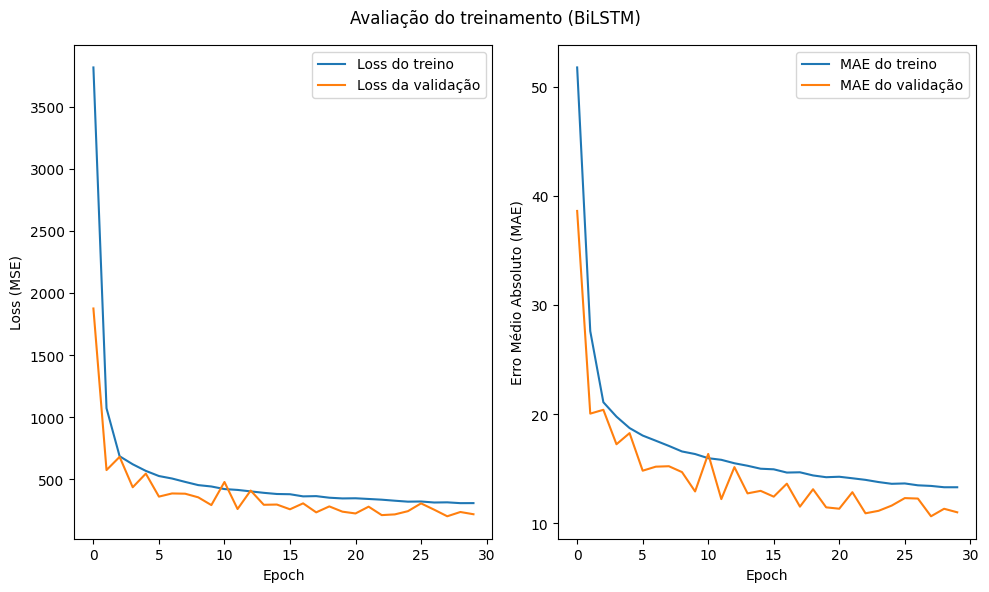

In [561]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [562]:
##Testando o modelo com os dados de teste

In [563]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [564]:
##Avaliando o modelo

276.9613331210259
16.64
0.13516232044294782
13.083591054541872
0.720335905674307
Tempo de 143.761108s


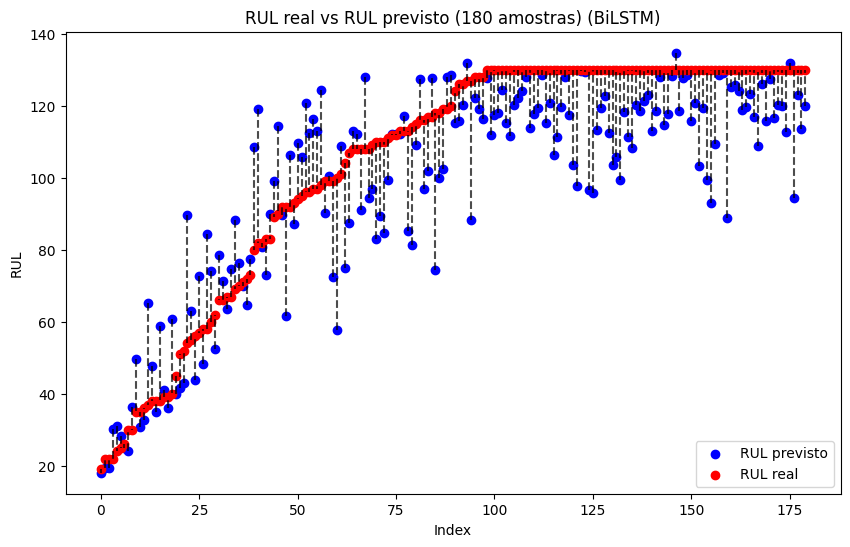

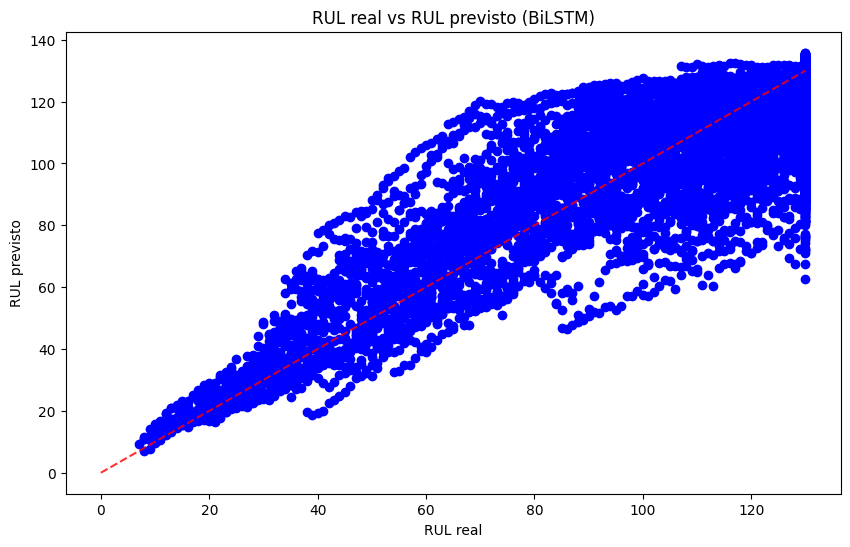

In [565]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()